# Part II - Effects of gender, Age and type of customer on duration of ride
## by Stephen Nyaga



This data set includes information about individual rides made in a bike-sharing system



## Investigation Overview
Investigate how each of the three factors(gender, Age and type of customer) affect length of duration of ride. 


## Dataset Overview

>This data set includes information about individual rides made in a bike-sharing system.
The fordgobike-tripdata dataset has 183412 rows and 16 columns. This indiactes that there is 183412 records with 17 features each.

In [2]:
# import all packages and set plots to be embedded inline
from requests import get
from io import BytesIO
from zipfile import ZipFile
from os import listdir 
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

Loading of the fordgobike-tripdata dataset

## Visualization 1:Univariate


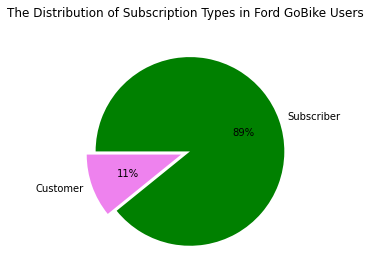

In [4]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', colors = ['green','violet'],startangle=180, counterclock = False ,explode = (0, 0.1));
plt.title("The Distribution of Subscription Types in Ford GoBike Users", fontsize=12, y=1.07)
plt.axis('square');

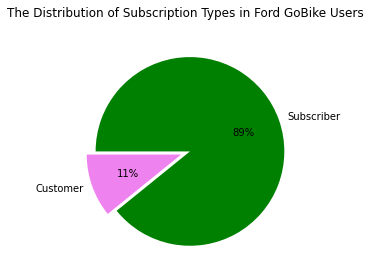
The users has two 89.2% of the users were Subscribers while the rest (10.8%) were Customers

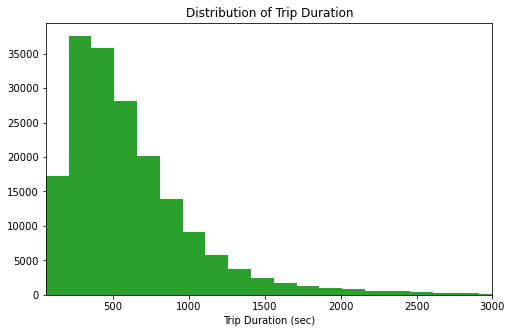

In [8]:

binsize = 150
bins = np.arange(60, df['duration_sec'].max()+binsize, binsize)
base_color = sb.color_palette()[2]
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins,color = base_color)
plt.xlim(61, 3000)
plt.xlabel('Trip Duration (sec)')
plt.title('Distribution of Trip Duration')
plt.show();


# The distribution is right-skewed, with a really long tail

# It was very difficult to view the plot, I had to reduce the bin size to 150 and put a limit of 3000 on x-axis. I will change the trip duration variable to minute instead of second.

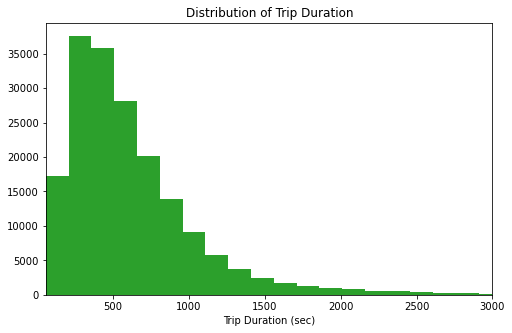
The distribution is right-skewed, with a really long tail

It was very difficult to view the plot, I had to reduce the bin size to 150 and put a limit of 3000 on x-axis. I will change the trip duration variable to minute instead of second.

In [29]:
# change trip duration variable from second to minute
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec' , axis = 1 , inplace = True)

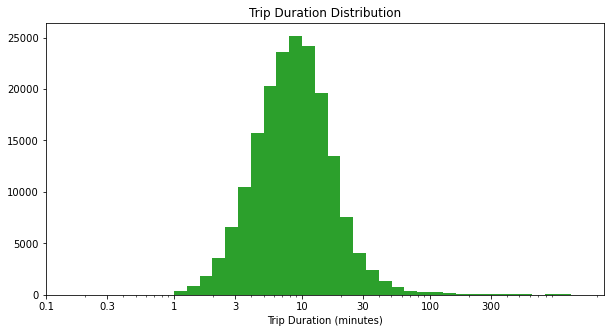

In [32]:

# trip duration distribution in log scale
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
base_color = sb.color_palette()[2]
plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'duration_min', bins = bins, color = base_color)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Trip Duration (minutes)')
plt.title('Trip Duration Distribution')
plt.show();

#Normal distribution of trip duration, but in minutes and with log scale on the x-axis

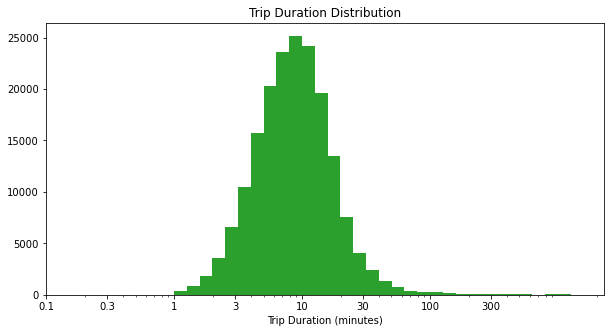
Normal distribution of trip duration, but in minutes and with log scale on the x-axis

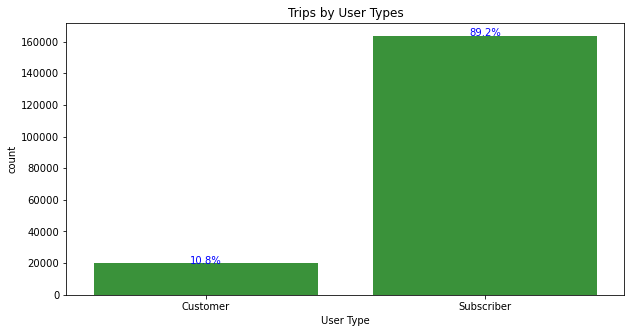

In [11]:
# plot distribution of user type
plt.figure(figsize=[10, 5])
base_color = sb.color_palette()[2]
sb.countplot(data = df, x = 'user_type', color = base_color)

n_points = df.shape[0]
user_counts = df['user_type'].value_counts()
locs, labels = plt.xticks()

# print frequency on the bar chart
for loc, label in zip(locs, labels):
    count = user_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.title('Trips by User Types')
plt.xlabel('User Type')

plt.show()
# The users has two 89.2% of the users were Subscribers while the rest (10.8%) were Customers

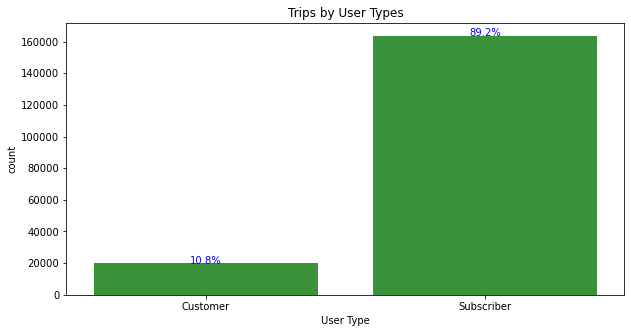
The users has two 89.2% of the users were Subscribers while the rest (10.8%) were Customers

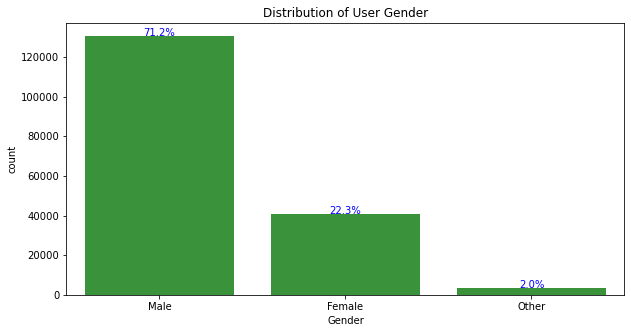

In [12]:
# plot distribution of gender
plt.figure(figsize=[10, 5])

base_color = sb.color_palette()[2]
gen_order = df['member_gender'].value_counts().index
sb.countplot(data = df, x = 'member_gender', color = base_color, order=gen_order)
plt.title('Distribution of User Gender')
plt.xlabel('Gender')

# print frequency on the bar chart
n_points = df.shape[0]
gender_counts = df['member_gender'].value_counts()
locs, labels = plt.xticks()

for loc, label in zip(locs, labels):
    count = gender_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    plt.text(loc, count-8, pct_string, ha='center', color='b')

plt.show()


# Almost 71.2% of the users are male and 22.3% of the users are female. There is a 2.0% of the who gender is not indicated

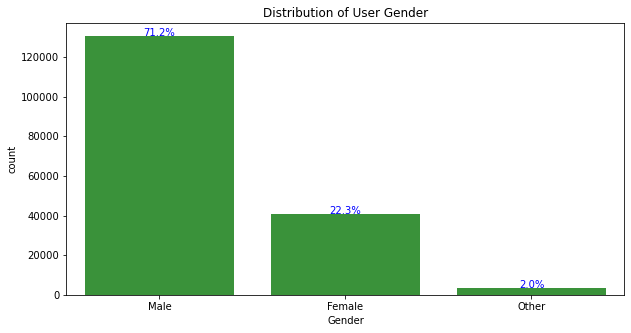
Almost 71.2% of the users are male and 22.3% of the users are female. There is a 2.0% of the who gender is not indicated

In [42]:
# calculate age of each user
def calculate_age(born):
    today = date.today()
    return today.year - born

df['age'] = df.member_birth_year.map(calculate_age)

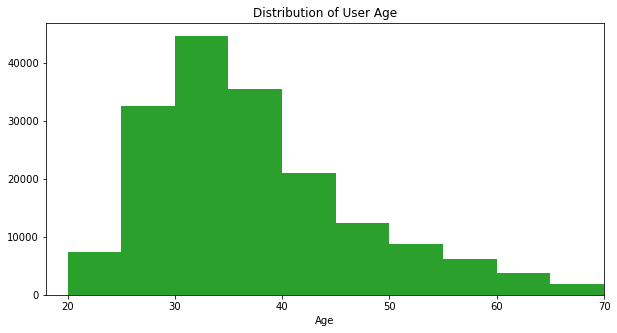

In [47]:
# plot distribution of age
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[2]
binsize = 5
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.hist(data = df, x = 'age', bins = bins,color = base_color )
plt.xlim(18, 70)
plt.xlabel('Age')
plt.title('Distribution of User Age')
plt.show()
# The distribution is right-skewed with the peak at between 30 to 35 and as age gets higher, user count decreases.

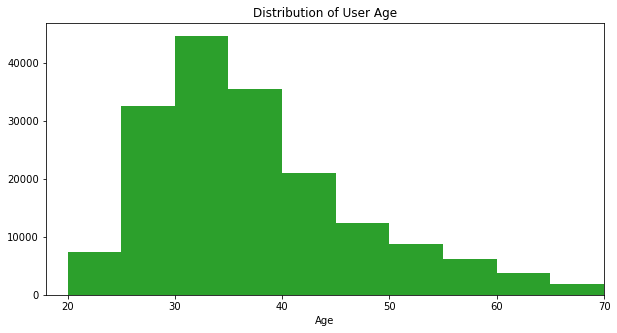
Almost 71.2% of the users are male and 22.3% of the users are female. There is a 2.0% of the who gender is not indicated

## Visualization 2:Bivariate

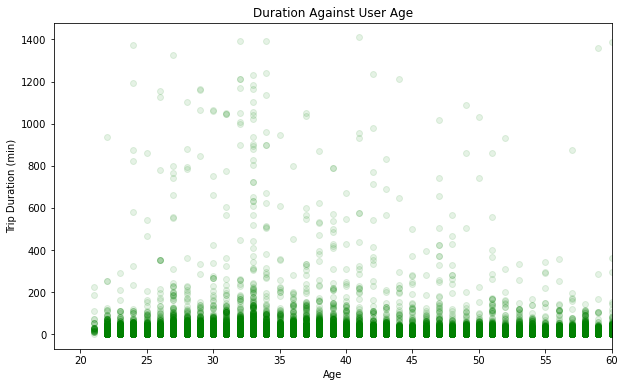

In [48]:
# scatter plot of duration vs. age
plt.figure(figsize = [10, 6])
plt.scatter(data = df, x = 'age', y = 'duration_min', alpha = 1/10, color = 'green')
plt.xlabel('Age')
plt.xlim(18, 60)
plt.ylabel('Trip Duration (min)')
plt.title('Duration Against User Age')
plt.show()
# Users with age of 31 and 36 seem to have the highest trip duration and as the users get older, the trip duration becomes less.

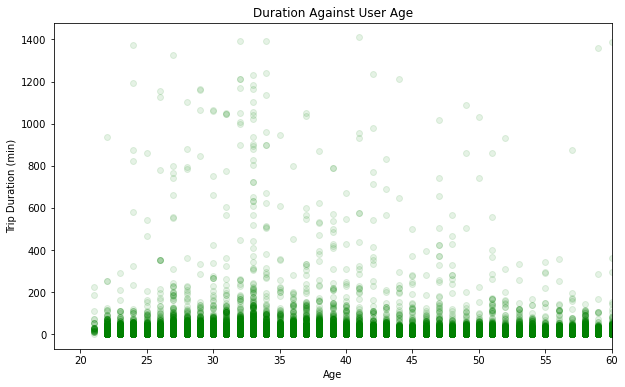
Users with age of 31 and 36 seem to have the highest trip duration and as the users get older, the trip duration becomes less.

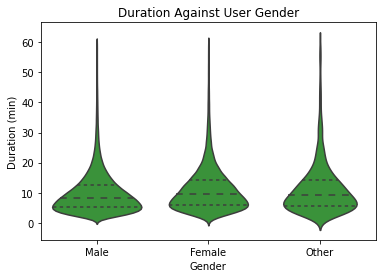

In [49]:
# query the data for duration only below 1 hour to focus the data
df_dur = df.query("duration_min < 60")

# plot relationship between gender and duration
base_color = sb.color_palette()[2]
sb.violinplot(data=df_dur, x='member_gender', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Gender');

# The previous section it was shown that 70% of the users were male, but the trip duration does not seem to be affected by the user gender. 
# The violin plots look similar for these 3 gender categories, with the median all similar (around 10 minutes).

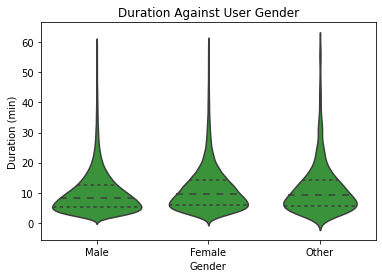
The previous section it was shown that 70% of the users were male, but the trip duration does not seem to be affected by the user gender. 
The violin plots look similar for these 3 gender categories, with the median all similar (around 10 minutes).

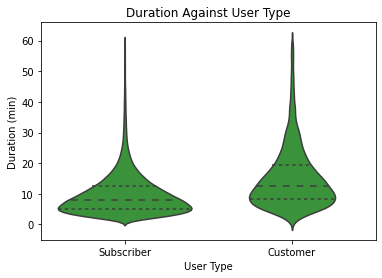

In [51]:
# plot relationship between user type and duration
base_color = sb.color_palette()[2]
sb.violinplot(data=df_dur, x='user_type', y='duration_min', color=base_color, inner='quartile')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Duration Against User Type');

# Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but
# the customer users might be tourists that use the bikes for traveling around town.

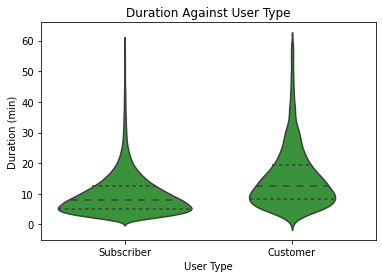
Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but
the customer users might be tourists that use the bikes for traveling around town.

## Visualization 3: Multivariate



C:\Users\Kay\AppData\Local\Temp\ipykernel_9432\1358758989.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age['member_age_bins'] = df_age['age'].apply(lambda x: '10 - 20' if 10<x<=20


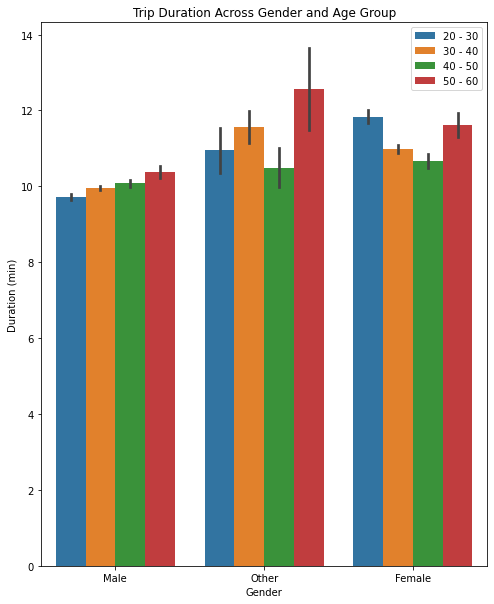

In [53]:
# remove users more than 60 years old
df_age = df_dur[df_dur['age']<=60]

# generate a new field for member age group
df_age['member_age_bins'] = df_age['age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)



# create bar plot on gender versus duration on levels of the age bins variable
plt.figure(figsize = [8, 10])

ax = sb.barplot(x='member_gender', y = 'duration_min', hue='member_age_bins', data=df_age.sort_values(by= 'member_age_bins'))
plt.title('Trip Duration Across Gender and Age Group')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
leg = ax.legend()

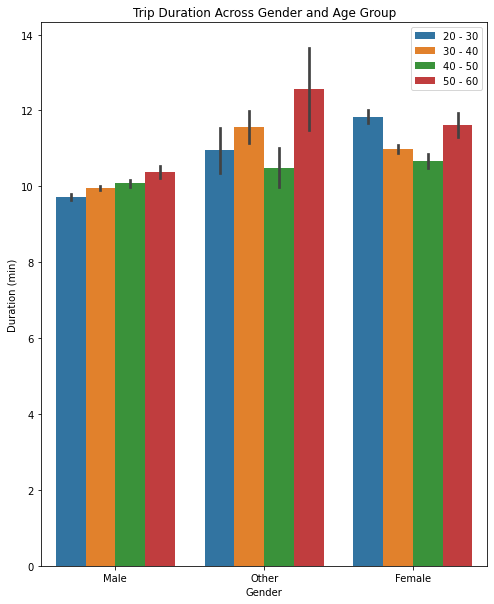
Subscriber users tend to ride the bikes in lesser duration than customer users. This might be because the subscriber users ride the bikes for regular commutes (work, school, etc.), but
the customer users might be tourists that use the bikes for traveling around town.

In [ ]:
Thank you.